In [1]:
import numpy as np
import pandas as pd


### **Timestamp Object**

Time stamps refrence particular moments in time (e.g Oct 24th, 2022 at 7:00 pm)

### **Creating Timestamp Objects**

In [2]:
# creating a timestamp -> year - month - date
pd.Timestamp('2023/1/5')


Timestamp('2023-01-05 00:00:00')

In [3]:
type(pd.Timestamp('2023/1/5'))


pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# variations
pd.Timestamp('2023-1-5')


Timestamp('2023-01-05 00:00:00')

In [6]:
pd.Timestamp('2023, 1, 5')


Timestamp('2023-01-05 00:00:00')

In [7]:
# only year
pd.Timestamp('2023')


Timestamp('2023-01-01 00:00:00')

In [8]:
# using text
pd.Timestamp('5th January 2023')


Timestamp('2023-01-05 00:00:00')

In [11]:
# providing time also
pd.Timestamp(year=2023, month=12, day=18, hour=9, minute=21)


Timestamp('2023-12-18 09:21:00')

In [12]:
pd.Timestamp('5th January 2023 9:21 AM')


Timestamp('2023-01-05 09:21:00')

In [13]:
# using datatime.datatime object
import datetime as dt

dt.datetime(2023, 1, 5, 9, 21, 56)


datetime.datetime(2023, 1, 5, 9, 21, 56)

In [15]:
x = pd.Timestamp(dt.datetime(2023, 1, 5, 9, 21, 56))
x


Timestamp('2023-01-05 09:21:56')

In [16]:
# fetching attributes
x.year


2023

In [17]:
x.month


1

In [18]:
x.day


5

In [19]:
x.hour


9

In [20]:
x.minute


21

In [21]:
x.second


56

In [22]:
# why seperate objects to handle date and time when python already has datetime functionality?


- syntax wise datetime is very convenlent
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [23]:
date = np.array('2015-07-04', dtype=np.datetime64)
date


array('2015-07-04', dtype='datetime64[D]')

In [24]:
date + np.arange(12)


array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, escpecially as arrays get large
- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64
- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### **DatetimeIndex Object**

A collection of pandas timestamp

In [26]:
# from strings
pd.DatetimeIndex(['2021/1/1', '2022/1/1', '2023/1/1'])


DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01'], dtype='datetime64[ns]', freq=None)

In [27]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023, 1, 1), dt.datetime(
    2022, 1, 1), dt.datetime(2021, 1, 1)])


DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [29]:
# using pd.Timestamp
dt_index = pd.DatetimeIndex([pd.Timestamp(2023, 1, 1), pd.Timestamp(
    2022, 1, 1), pd.Timestamp(2021, 1, 1)])
dt_index


DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [30]:
# using datetimeindex as series index
pd.Series([1, 2, 3], index=dt_index)


2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

### **date_range function**

In [31]:
# generate daily dates in the given range
pd.date_range(start='2023/1/5', end='2023/1/31', freq='D')


DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [32]:
# alternate dates
pd.date_range(start='2023/1/5', end='2023/1/31', freq='2D')


DatetimeIndex(['2023-01-05', '2023-01-07', '2023-01-09', '2023-01-11',
               '2023-01-13', '2023-01-15', '2023-01-17', '2023-01-19',
               '2023-01-21', '2023-01-23', '2023-01-25', '2023-01-27',
               '2023-01-29', '2023-01-31'],
              dtype='datetime64[ns]', freq='2D')

In [33]:
# remove 2 days
# alternate days in a given range
pd.date_range(start='2023/1/5', end='2023/1/31', freq='3D')


DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='3D')

In [34]:
# B- > business days
pd.date_range(start='2023/1/5', end='2023/1/31', freq='B')


DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='B')

In [35]:
# W -> one weak per day (sunday)
pd.date_range(start='2023/1/5', end='2023/1/31', freq='W')


DatetimeIndex(['2023-01-08', '2023-01-15', '2023-01-22', '2023-01-29'], dtype='datetime64[ns]', freq='W-SUN')

In [36]:
# W-THU for only thursday
pd.date_range(start='2023/1/5', end='2023/1/31', freq='W-THU')


DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26'], dtype='datetime64[ns]', freq='W-THU')

In [38]:
# H -> Hourly data(factor)
pd.date_range(start='2023/1/5', end='2023/2/28', freq='H')


DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 01:00:00',
               '2023-01-05 02:00:00', '2023-01-05 03:00:00',
               '2023-01-05 04:00:00', '2023-01-05 05:00:00',
               '2023-01-05 06:00:00', '2023-01-05 07:00:00',
               '2023-01-05 08:00:00', '2023-01-05 09:00:00',
               ...
               '2023-02-27 15:00:00', '2023-02-27 16:00:00',
               '2023-02-27 17:00:00', '2023-02-27 18:00:00',
               '2023-02-27 19:00:00', '2023-02-27 20:00:00',
               '2023-02-27 21:00:00', '2023-02-27 22:00:00',
               '2023-02-27 23:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=1297, freq='H')

In [39]:
# every 6 hour
pd.date_range(start='2023/1/5', end='2023/2/28', freq='6H')


DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='6H')

In [40]:
# M -> Month end
pd.date_range(start='2023/1/5', end='2023/2/28', freq='M')


DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='M')

In [41]:
# MS -> Month start
pd.date_range(start='2023/1/5', end='2023/2/28', freq='MS')


DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [43]:
# A -> year end
pd.date_range(start='2023/1/5', end='2030/2/28', freq='A')


DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [44]:
# using periods(number of results)
pd.date_range(start='2023/1/5', periods=25, freq='D')


DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# hourly -> number of result
pd.date_range(start='2023/1/5', periods=25, freq='H')


DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 01:00:00',
               '2023-01-05 02:00:00', '2023-01-05 03:00:00',
               '2023-01-05 04:00:00', '2023-01-05 05:00:00',
               '2023-01-05 06:00:00', '2023-01-05 07:00:00',
               '2023-01-05 08:00:00', '2023-01-05 09:00:00',
               '2023-01-05 10:00:00', '2023-01-05 11:00:00',
               '2023-01-05 12:00:00', '2023-01-05 13:00:00',
               '2023-01-05 14:00:00', '2023-01-05 15:00:00',
               '2023-01-05 16:00:00', '2023-01-05 17:00:00',
               '2023-01-05 18:00:00', '2023-01-05 19:00:00',
               '2023-01-05 20:00:00', '2023-01-05 21:00:00',
               '2023-01-05 22:00:00', '2023-01-05 23:00:00',
               '2023-01-06 00:00:00'],
              dtype='datetime64[ns]', freq='H')

### **to_datetime function**

converts an existing objects to pandas timestamp/ datetimeindex object

In [49]:
# simple series example
s = pd.Series(['2023/1/1', '2022/1/1', '2021/1/1'])
s


0    2023/1/1
1    2022/1/1
2    2021/1/1
dtype: object

In [50]:
s.str.split('/').str.get(0)


0    2023
1    2022
2    2021
dtype: object

In [54]:
p = pd.to_datetime(s)
p


0   2023-01-01
1   2022-01-01
2   2021-01-01
dtype: datetime64[ns]

In [55]:
p.dt.year


0    2023
1    2022
2    2021
dtype: int64

In [56]:
p.dt.month


0    1
1    1
2    1
dtype: int64

In [57]:
p.dt.day


0    1
1    1
2    1
dtype: int64

In [59]:
p.dt.month_name()


0    January
1    January
2    January
dtype: object

In [60]:
p.dt.day_name()


0      Sunday
1    Saturday
2      Friday
dtype: object

In [62]:
# with errors
s = pd.Series(['2023/1/1', '2022/1/1', '2021/130/1'])
s


0      2023/1/1
1      2022/1/1
2    2021/130/1
dtype: object

In [63]:
# error
pd.to_datetime(s)


ParserError: Unknown string format: 2021/130/1

In [64]:
# solution of error -> means skip -> NaT (not a time)
pd.to_datetime(s, errors='coerce')


0   2023-01-01
1   2022-01-01
2          NaT
dtype: datetime64[ns]

In [87]:
df = pd.read_csv('expense_data.csv')
df.head()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [67]:
pd.to_datetime(df['Date'])


0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [88]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### **dt accessor**

Accessor object for datetimelike properties of the series values.

In [70]:
df['Date'].dt.year


0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int64

In [71]:
df['Date'].dt.month


0       3
1       3
2       3
3       3
4       3
       ..
272    11
273    11
274    11
275    11
276    11
Name: Date, Length: 277, dtype: int64

In [73]:
df['Date'].dt.month_name()


0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [75]:
df['Date'].dt.day_name()


0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

In [77]:
df['Date'][df['Date'].dt.is_month_end]


7     2022-02-28 11:56:00
8     2022-02-28 11:45:00
61    2022-01-31 08:44:00
62    2022-01-31 08:27:00
63    2022-01-31 08:26:00
242   2021-11-30 14:24:00
243   2021-11-30 14:17:00
244   2021-11-30 10:11:00
Name: Date, dtype: datetime64[ns]

In [80]:
df['Date'][df['Date'].dt.is_quarter_end]


Series([], Name: Date, dtype: datetime64[ns])

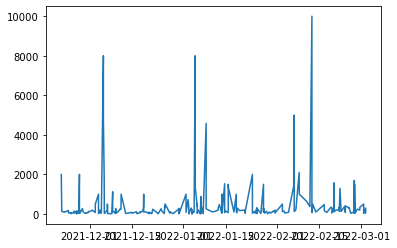

In [81]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['INR'])


In [89]:
df['day_name'] = df['Date'].dt.day_name()
df.head()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<AxesSubplot:xlabel='day_name'>

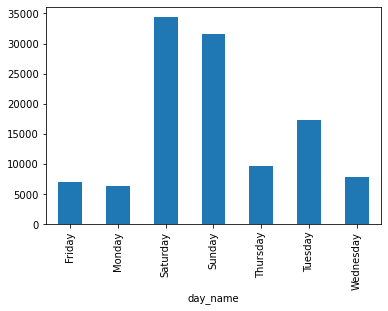

In [90]:
df.groupby('day_name')['INR'].sum().plot(kind='bar')


<AxesSubplot:xlabel='month_name'>

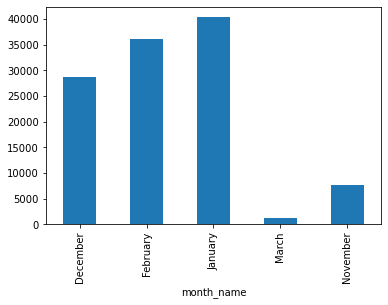

In [92]:
df['month_name'] = df['Date'].dt.month_name()
df.groupby('month_name')['INR'].sum().plot(kind='bar')
